In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILE = 'C:/Users/ss/Downloads/fruits_300.npy'

In [3]:
fruits = np.load(FILE)

In [4]:
fruits.shape

(300, 100, 100)

In [5]:
fruits_2d = fruits.reshape(-1, 100*100)

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(init='random', n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(init='random', n_clusters=3, random_state=42)

In [8]:
print(km.labels_)

[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [9]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([ 98,  90, 112], dtype=int64))


In [10]:
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

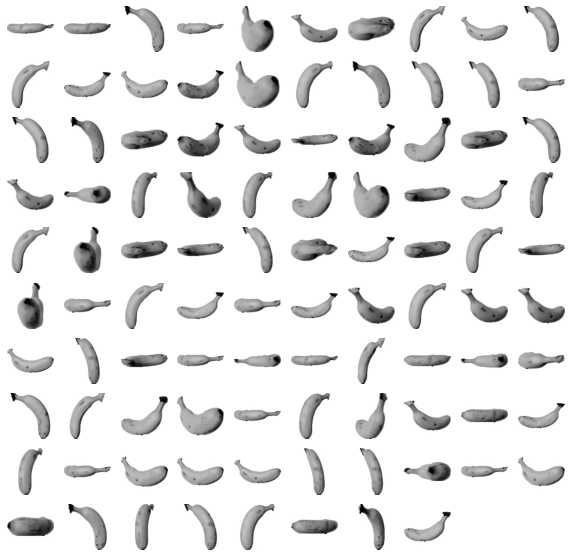

In [11]:
draw_fruits(fruits[km.labels_==0])

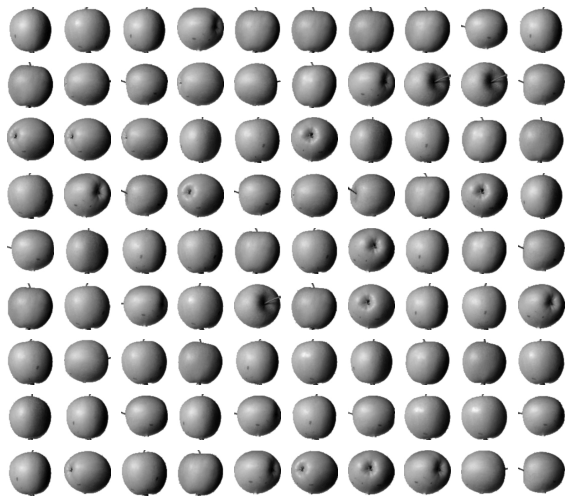

In [12]:
draw_fruits(fruits[km.labels_==1])

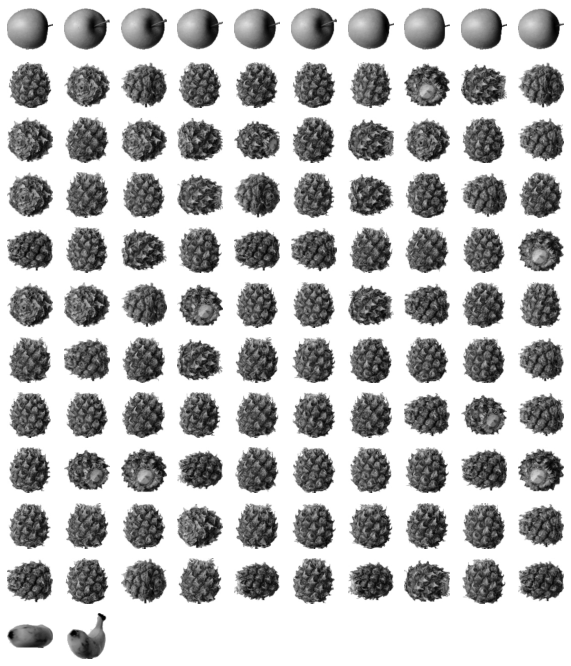

In [13]:
draw_fruits(fruits[km.labels_==2])

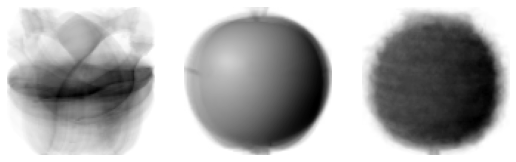

In [14]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

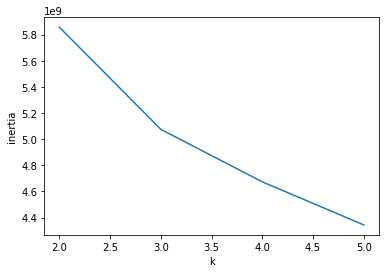

In [17]:
inertia = []
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 6), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()